The objective is to find or propose an effective unsupervised
learning technique that can identify the natural groups (or clusters) in the given data set.

# Importing the libraries:

In [70]:
# Basic Libraries for Machine Learning
import numpy as np
import pandas as pd

# For Date Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn library
import sklearn

# For Scaling the datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For importing the models
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, SpectralClustering, AgglomerativeClustering, DBSCAN, Birch
from sklearn.neighbors import kneighbors_graph
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as shc
from sklearn.metrics.cluster import normalized_mutual_info_score

# Data Collection and Pre-Processing:

In [71]:
# reading data as dataframes
data = pd.read_csv('/content/data.csv', header=None)
data.rename(columns={0:"A", 1:"B"}, inplace = True)

In [72]:
data.head()

,A,B
0,-0.635700,0.472938
1,0.686418,-0.481948
2,0.882468,0.086016
3,1.566876,0.422147
4,-0.788983,0.743609


In [73]:
data.tail()

,A,B
3995,0.399613,-0.298868
3996,1.317083,-0.012860
3997,0.510458,-0.232525
3998,0.944405,0.316614
3999,0.690487,-0.489712


In [74]:
data.shape

(4000, 2)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4000 non-null   float64
 1   B       4000 non-null   float64
dtypes: float64(2)
memory usage: 62.6 KB


In [76]:
print(data.nunique())

A    4000
B    4000
dtype: int64


# Plotting the given dataset:

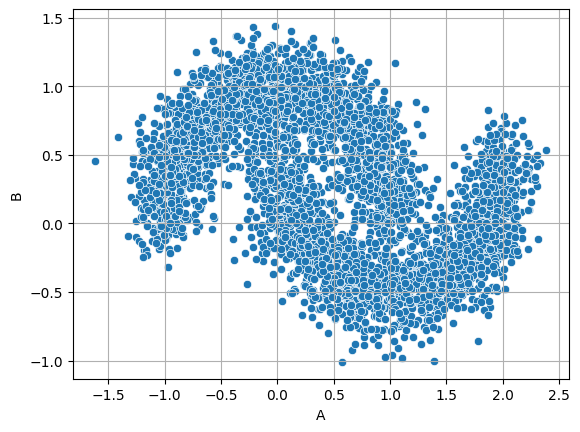

In [77]:
# Plot the clusters with normal dataset
sns.scatterplot(x = data.A, y = data.B)
plt.xlabel('A')
plt.ylabel('B')
plt.grid()
plt.show()

# Feature Scaling:

In [78]:
scaler = StandardScaler()

In [79]:
data_scaler = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [80]:
data_scaler.head()

,A,B
0,-1.281175,0.424483
1,0.212279,-1.401768
2,0.433735,-0.315519
3,1.206837,0.327343
4,-1.454322,0.942149


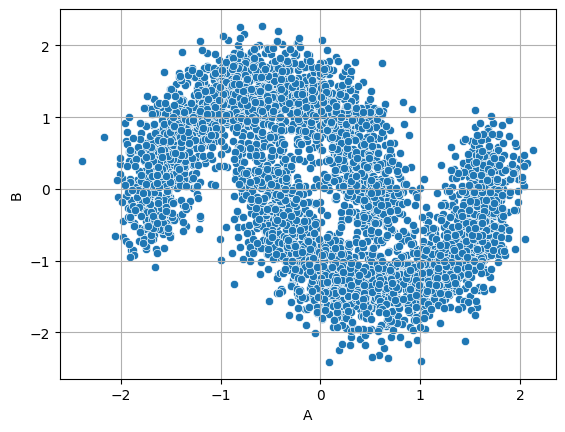

In [81]:
# Plot the clusters for scaled dataset
sns.scatterplot(x = data_scaler.A, y = data_scaler.B)
plt.xlabel('A')
plt.ylabel('B')
plt.grid()
plt.show()

# KMeans:

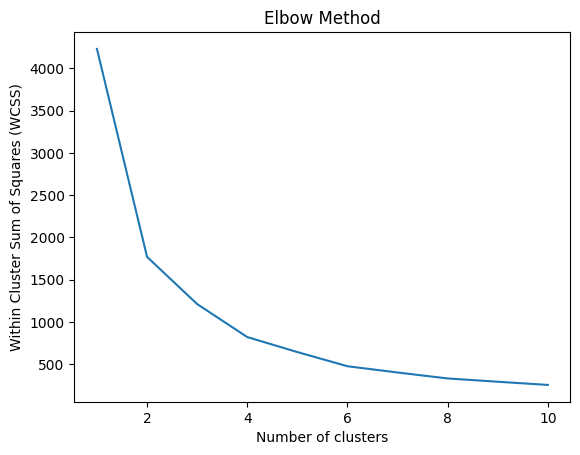

In [82]:
# Determine optimal cluster number with elbow method for k-means clustering
wcss = []

for i in range(1, 11):                                  # Range from 1 to 10
    kmeans = cluster.KMeans(n_clusters = i,     
                    init = 'k-means++',                 # We are initialization kmeans method
                    max_iter = 300,                     # Maximum number of iterations for kmeans
                    n_init = 10,                        # Choosing how often algorithm will run with different centroid 
                    random_state = 0)                   # Random state for reproducibility
    kmeans.fit(data)                                    # Fitting data
    wcss.append(kmeans.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               
plt.xlabel('Number of clusters')                        
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      
plt.show()


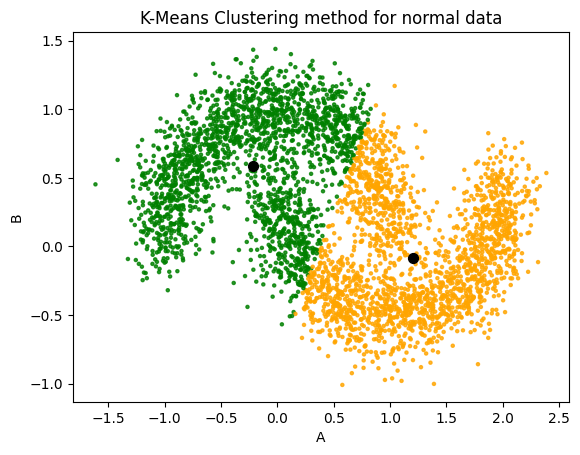

[[-0.21229122  0.58526464]
 [ 1.20643891 -0.08194984]]


In [83]:
# Building k-means clustering model for normal data
kmeans = cluster.KMeans(n_clusters = 2,                 # Setting the amount of clusters
                init = 'k-means++',                     # We are initialization kmeans method
                max_iter = 300,                         # Maximum number of iterations for kmeans
                n_init = 10,                            # Choosing how often algorithm will run with different centroid
                random_state = 0)                       # Random state for reproducibility

# Training the model and predicting cluster labels
label_kmeans = kmeans.fit_predict(data)

# Plot the clusters
colors = ["green", "orange"]
colormap = mpl.colors.ListedColormap(colors)

# Normal data
plt.scatter(data.A, data.B, c=label_kmeans, cmap=colormap, s=5, alpha = 0.8)

# Plot the clusters centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=50,
            c='black')
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering method for normal data')
plt.show()
print(kmeans.cluster_centers_)

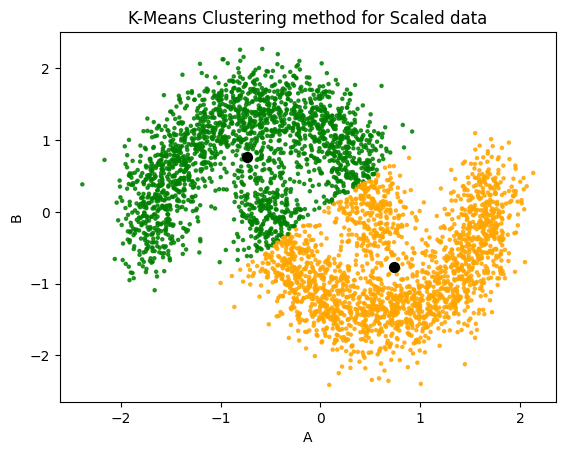

[[-0.73372014  0.76176954]
 [ 0.73518905 -0.76329461]]


In [84]:
# Building k-means clustering model for scaled data
kmeans = cluster.KMeans(n_clusters = 2,                 # Setting the amount of clusters
                init = 'k-means++',                     # We are initialization kmeans method
                max_iter = 300,                         # Maximum number of iterations for kmeans
                n_init = 10,                            # Choosing how often algorithm will run with different centroid
                random_state = 0)                       # Random state for reproducibility

# Training the model and predicting cluster labels
label_kmeans_scaled = kmeans.fit_predict(data_scaler)

# Plot the clusters
colors = ["green", "orange"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(data_scaler.A, data_scaler.B, c=label_kmeans_scaled, cmap=colormap, s=5, alpha = 0.8)

# Plot the clusters centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=50,
            c='black')
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering method for Scaled data')
plt.show()
print(kmeans.cluster_centers_)

# Agglomerative Clustering:

**Complete linkage** minimizes the maximum distance between observations of pairs of clusters.

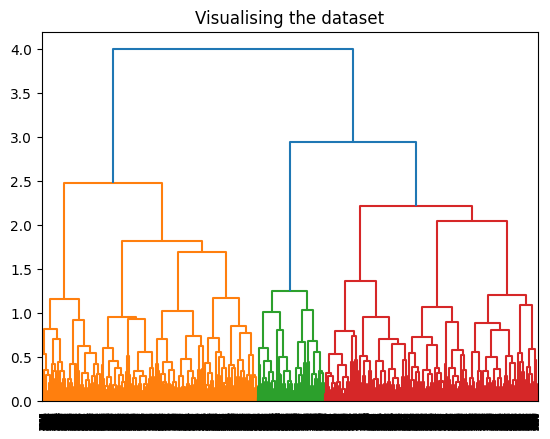

In [85]:
# Now we are going to use complete linkage method under agglomerative clustering
# Visualization of cluster hierarchy
plt.title('Visualising the dataset')
Dendrogram = shc.dendrogram((shc.linkage(data, method ='complete')))

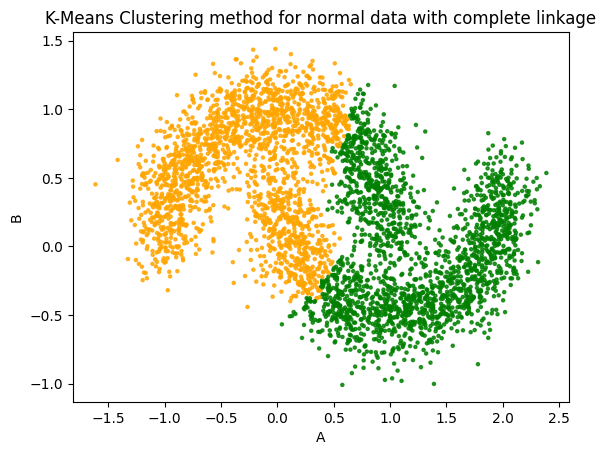

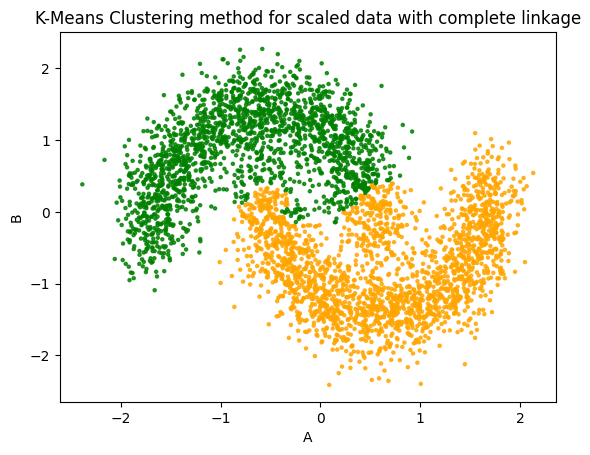

In [86]:
# Building agglomerative clustering model for complete linkage
ac = cluster.AgglomerativeClustering(n_clusters = 2, metric = 'manhattan', linkage = 'complete') # No. of cluster is two

# Training the model and predicting cluster labels  
label_ac_com = ac.fit_predict(data)
label_ac_scaled_com = ac.fit_predict(data_scaler)

# Plot the clusters
colors = ["green", "orange"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(data.A, data.B, c=label_ac_com, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering method for normal data with complete linkage')
plt.show()

plt.scatter(data_scaler.A, data_scaler.B, c=label_ac_scaled_com, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering method for scaled data with complete linkage')
plt.show()

**Single linkage** minimizes the distance between the closest observations of pairs of clusters.

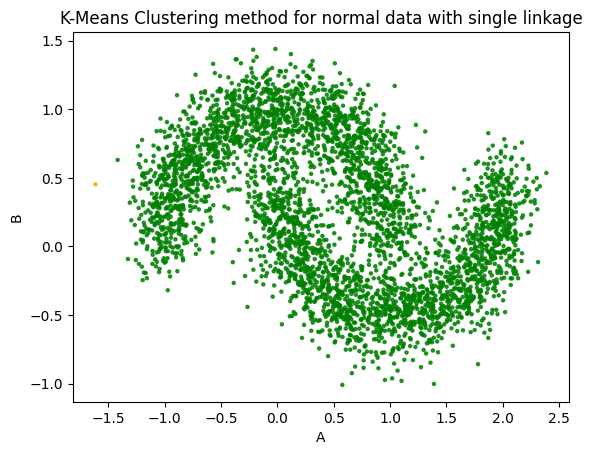

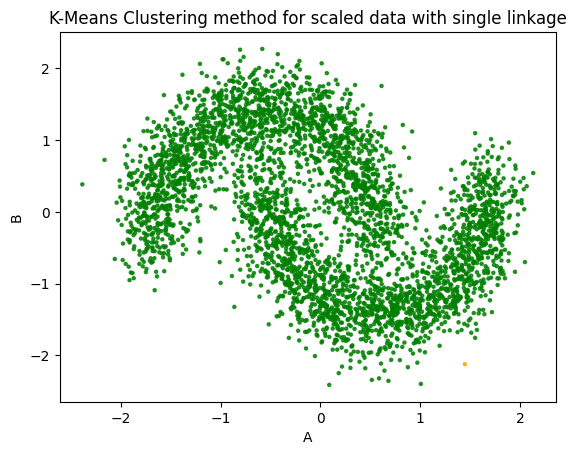

In [87]:
# Building agglomerative clustering model for single linkage
ac = cluster.AgglomerativeClustering(n_clusters = 2, metric = 'manhattan', linkage = 'single') # No. of cluster is two

# Training the model and predicting cluster labels  
label_ac_single = ac.fit_predict(data)
label_ac_scaled_single = ac.fit_predict(data_scaler)

# Plot the clusters
colors = ["green", "orange"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(data.A, data.B, c=label_ac_single, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering method for normal data with single linkage')
plt.show()

plt.scatter(data_scaler.A, data_scaler.B, c=label_ac_scaled_single, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering method for scaled data with single linkage')
plt.show()

**Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

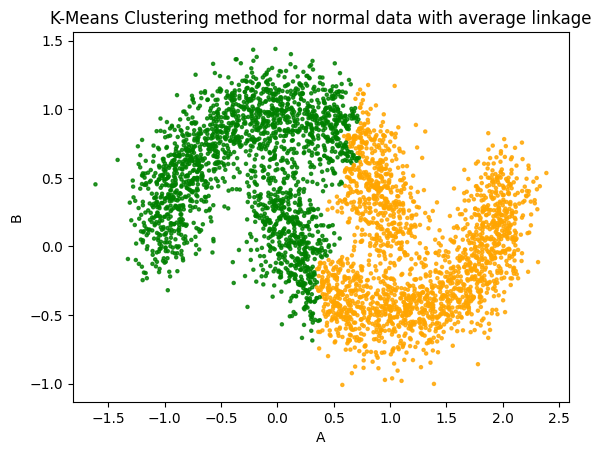

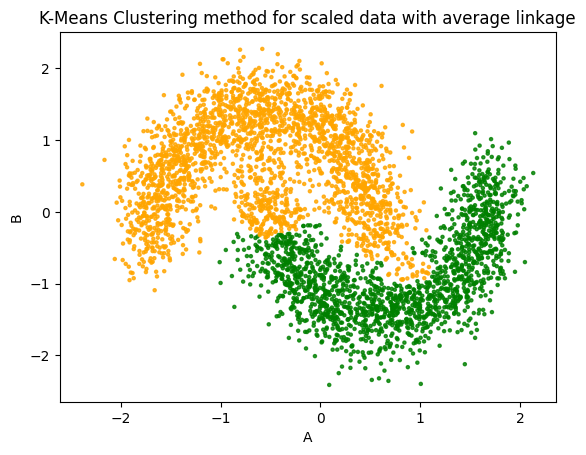

In [88]:
# Building agglomerative clustering model for average linkage
ac = cluster.AgglomerativeClustering(n_clusters = 2, metric = 'manhattan', linkage = 'average') # No. of cluster is two

# Training the model and predicting cluster labels  
label_ac_average = ac.fit_predict(data)
label_ac_scaled_average = ac.fit_predict(data_scaler)

# Plot the clusters
colors = ["green", "orange"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(data.A, data.B, c=label_ac_average, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering method for normal data with average linkage')
plt.show()

plt.scatter(data_scaler.A, data_scaler.B, c=label_ac_scaled_average, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('K-Means Clustering method for scaled data with average linkage')
plt.show()

# Spectral Clustering:

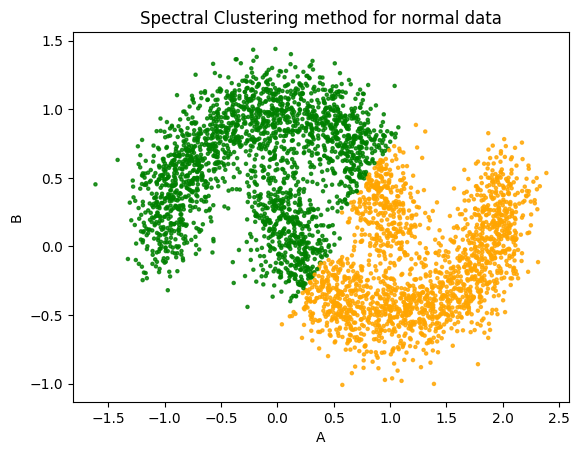

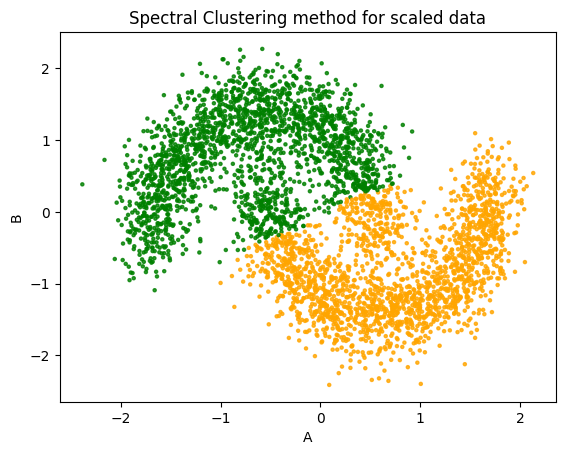

In [89]:
# Building Spectral clustering model
sc = SpectralClustering(n_clusters = 2, eigen_solver="arpack", affinity="nearest_neighbors")

# Training the model and predicting cluster labels
label_sc= sc.fit_predict(data)
label_sc_scaled = sc.fit_predict(data_scaler)

# normal data
colors = ["green", "orange"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(data.A, data.B, c=label_sc, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Spectral Clustering method for normal data')
plt.show()

# scaled data
plt.scatter(data_scaler.A, data_scaler.B, c=label_sc_scaled, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Spectral Clustering method for scaled data')
plt.show()

# Gaussian Mixture Models:

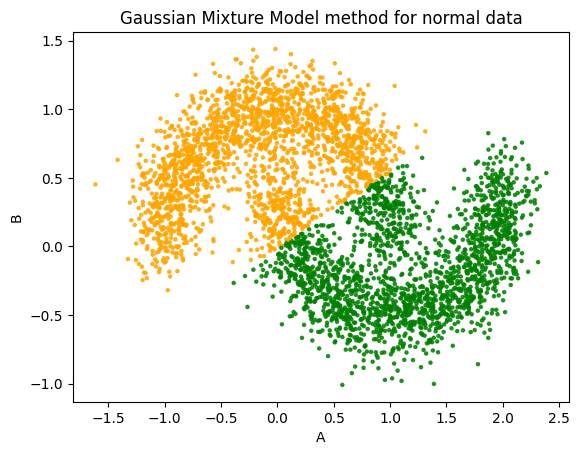

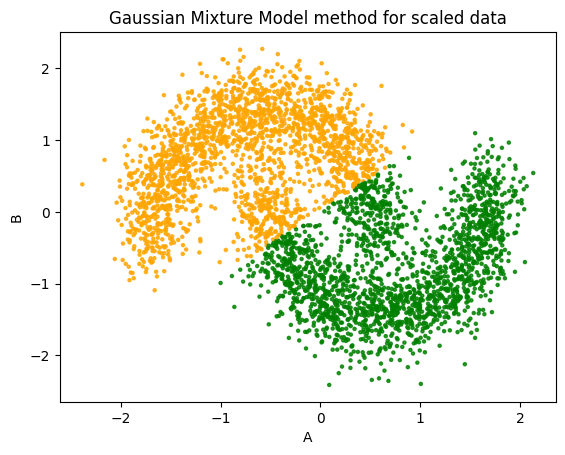

In [90]:
# Building Gaussian Mixture Model
gm = GaussianMixture(n_components=2)

# Training the model and predicting cluster labels
label_gm = gm.fit_predict(data)
label_gm_scaled = gm.fit_predict(data_scaler)

# normal data
plt.scatter(data.A, data.B, c=label_gm, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Gaussian Mixture Model method for normal data')
plt.show()

# scaled data
plt.scatter(data_scaler.A, data_scaler.B, c=label_gm_scaled, cmap=colormap, s=5, alpha = 0.8)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Gaussian Mixture Model method for scaled data')
plt.show()

# DBSCAN:

After searching iteratively, narrowing down the parameters.
We have used direct visualization to evaluate the performance of the model

Estimated number of clusters: 2


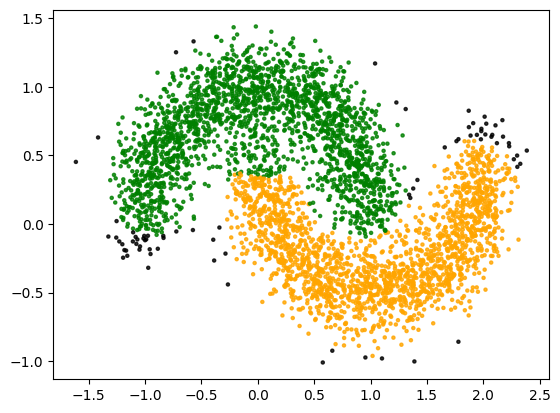

In [91]:
data1=data[['A','B']].values
# Building DBSCAN Clustering model
dbscan = DBSCAN(eps = 0.34, min_samples=310)

# Training the model and predicting cluster labels
label_db = dbscan.fit_predict(data1)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(label_db)) - (1 if -1 in label_db else 0)
print("Estimated number of clusters: %d" % n_clusters_)

# Plot the clusters
colors = ["black", "green", "orange"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(data1[:, 0], data1[:, 1], c=label_db, cmap=colormap, s=5, alpha = 0.8)
plt.show()

# Best Model ( which is evaluated by visualizing):

DBSCAN seems good in terms of performance but, the problem is it still predicts some points as outliers.

In [92]:
# Extract cluster labels (-1 for noise points)
y_pred_db = label_db
# Get unique cluster labels and their counts
unique_labels, counts = np.unique(y_pred_db[y_pred_db != -1], return_counts=True)
# Print number of data points in each cluster
for label, count in zip(unique_labels, counts):
    print(f"Cluster Label {label}: {count} data points")

Cluster Label 0: 2060 data points
Cluster Label 1: 1862 data points


In [93]:
pd.DataFrame(label_db).to_csv("Predicted_cluster_labels.csv", header=False, index=False)

Importing the labels into text file

In [94]:
import csv
with open('vimaleswar_labels.txt', mode='a', newline='') as f:
    writer = csv.writer(f)
    writer.writerows([[label_db[i]] for i in range(len(label_db))])